In [21]:
import random

def int_to_bin8(x):
    return f'{x:08b}'

def set_bit(byte_arr, bit_pos, bit_val):
    byte_index = bit_pos // 8
    bit_index = 7 - (bit_pos % 8)
    if bit_val == 1:
        byte_arr[byte_index] |= (1 << bit_index)
    else:
        byte_arr[byte_index] &= ~(1 << bit_index)

def get_bit_array(byte_arr):
    return [((byte >> (7 - i)) & 1) for byte in byte_arr for i in range(8)]

def print_binary_string(bit_array, label):
    bit_str = ''.join(str(bit) for bit in bit_array)
    print(f"\n🧾 {label} (256 bits):\n{bit_str}")

def print_diff_image(before, after, positions, label):
    print(f"\n📷 {label} (⬛=0 ⬜=1 🟥=Changed Bit):")
    for i in range(0, 256, 16):
        row = ""
        for j in range(16):
            index = i + j
            if before[index] != after[index] and index in positions:
                row += '🟥'
            elif after[index] == 1:
                row += '⬜'
            else:
                row += '⬛'
        print(row)

# === Step 1: Generate 256-bit random image ===
original_image = bytearray([random.randint(0, 255) for _ in range(32)])
image = original_image[:]  # Copy for modification

# === Step 2: Generate 8-bit message and key (ensuring they are not the same) ===
while True:
    message = random.randint(0, 255)
    key = random.randint(0, 255)
    if message != key:
        break

message_bits = [int(b) for b in int_to_bin8(message)]
key_bits = [int(b) for b in int_to_bin8(key)]

positions = [10, 45, 73, 99, 123, 150, 200, 230]

#Encrypt message with key using XOR
encrypted_message_bits = [message_bits[i] ^ key_bits[i] for i in range(8)]

# Embedding
for i in range(8):
    set_bit(image, positions[i], encrypted_message_bits[i])

# Decrypt
retrieved_bits = []
for i in range(8):
    byte_index = positions[i] // 8
    bit_index = 7 - (positions[i] % 8)
    bit = (image[byte_index] >> bit_index) & 1
    retrieved_bits.append(bit)

decrypted_bits = [retrieved_bits[i] ^ key_bits[i] for i in range(8)]
retrieved_binary = ''.join(str(b) for b in decrypted_bits)
retrieved_decimal = int(retrieved_binary, 2)

# Display
original_bits = get_bit_array(original_image)
encrypted_bits = get_bit_array(image)

print_binary_string(original_bits, "Original 256-bit Image")
print_binary_string(encrypted_bits, "Encrypted 256-bit Image")
print_diff_image(original_bits, encrypted_bits, positions, "Visual Difference")

print("\n📝 Message:", int_to_bin8(message), "(Decimal:", message, ")")
print("🔑 Key    :", int_to_bin8(key), "(Decimal:", key, ")")
print("📌 Bit Positions Used:", positions)
print("\n🔒 Encrypted Bits  :", ''.join(str(b) for b in encrypted_message_bits))
print("🔓 Retrieved Binary:", retrieved_binary)
print("🔓 Retrieved Decimal:", retrieved_decimal)



🧾 Original 256-bit Image (256 bits):
1111110111110010001010100000101010110011111110100100011110111110110111010001110000101011010111110110001100110000001001100110000000011001010100001100100101011110111001010110001000111010111001011011010011011110001101010101001101010100101100001100111111111011

🧾 Encrypted 256-bit Image (256 bits):
1111110111010010001010100000101010110011111111100100011110111110110111010001110000101011010111110110001100110000001001100111000000011001010100001100101101011110111001010110001000111010111001011011010001011110001101010101001101010110101100001100111111111011

📷 Visual Difference (⬛=0 ⬜=1 🟥=Changed Bit):
⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜🟥⬜⬛⬛⬜⬛
⬛⬛⬜⬛⬜⬛⬜⬛⬛⬛⬛⬛⬜⬛⬜⬛
⬜⬛⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜🟥⬜⬛
⬛⬜⬛⬛⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛
⬜⬜⬛⬜⬜⬜⬛⬜⬛⬛⬛⬜⬜⬜⬛⬛
⬛⬛⬜⬛⬜⬛⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜
⬛⬜⬜⬛⬛⬛⬜⬜⬛⬛⬜⬜⬛⬛⬛⬛
⬛⬛⬜⬛⬛⬜⬜⬛⬛⬜⬜🟥⬛⬛⬛⬛
⬛⬛⬛⬜⬜⬛⬛⬜⬛⬜⬛⬜⬛⬛⬛⬛
⬜⬜⬛⬛⬜⬛🟥⬜⬛⬜⬛⬜⬜⬜⬜⬛
⬜⬜⬜⬛⬛⬜⬛⬜⬛⬜⬜⬛⬛⬛⬜⬛
⬛⬛⬜⬜⬜⬛⬜⬛⬜⬜⬜⬛⬛⬜⬛⬜
⬜⬛⬜⬜⬛⬜⬛⬛🟥⬜⬛⬜⬜⬜⬜⬛
⬛⬛⬜⬜⬛⬜⬛⬜⬛⬜⬛⬜⬛⬛⬜⬜
⬛⬜⬛⬜⬛⬜🟥⬛⬜⬛⬜⬜⬛⬛⬛⬛
⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜

📝 Message: 10000101 (Decimal: 133 )
🔑 Key    : 11001000 (Decimal: 200 )
📌 Bit Positions Us

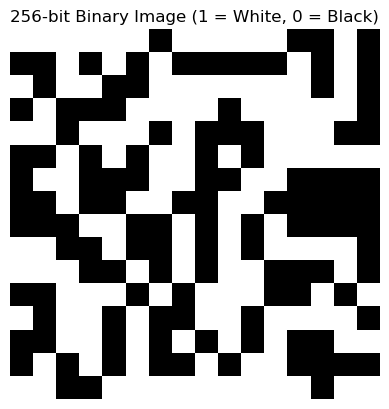

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Your 256-bit binary image
binary_image = (
    "1111110111110010001010100000101010110011111110100100011110111110"
    "1101110100011100001010110101111101100011001100000010011001100000"
    "0001100101010000110010010101111011100101011000100011101011100101"
    "1011010011011110001101010101001101010100101100001100111111111011"
)

# Convert to 16x16 NumPy array
bit_array = np.array([int(b) for b in binary_image]).reshape((16, 16))

plt.imshow(bit_array, cmap='gray', vmin=0, vmax=1)
plt.title("256-bit Binary Image (1 = White, 0 = Black)")
plt.axis('off')
plt.show()


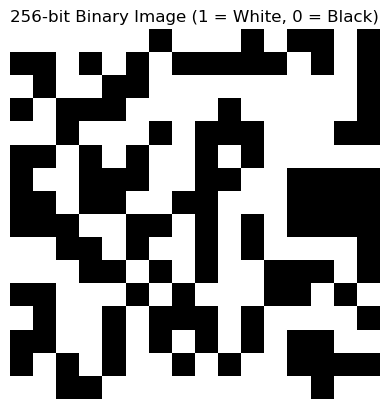

In [7]:
import matplotlib.pyplot as plt
import numpy as np

binary_image = (
    "1111110111010010001010100000101010110011111111100100011110111110"
    "1101110100011100001010110101111101100011001100000010011001110000"
    "0001100101010000110010110101111011100101011000100011101011100101"
    "1011010001011110001101010101001101010110101100001100111111111011"
)

# Convert to 16x16 NumPy array
bit_array = np.array([int(b) for b in binary_image]).reshape((16, 16))

plt.imshow(bit_array, cmap='gray', vmin=0, vmax=1)
plt.title("256-bit Binary Image (1 = White, 0 = Black)")
plt.axis('off')
plt.show()
